In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1e27X7344PjW366tA6EtGWasJYZvf4MQc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=iD" -O MARIDA.zip && rm -rf /tmp/cookies.txt
from google.colab import drive
drive.mount('/content/drive')
# Set folder path

folder_path = "/content/drive/MyDrive/Colab Notebooks/DL project/data"

# List folder contents
import os
os.listdir(folder_path)

!cd "/content/drive/MyDrive/Colab Notebooks/DL project/data"
import pandas as pd
#Spectral signature extraction
hdf = pd.HDFStore("/content/drive/MyDrive/Colab Notebooks/DL project/data/dataset.h5", mode = "r")
#Slitting into train, val and test datasets
df_train = hdf.select('train')
df_val = hdf.select('val')
df_test = hdf.select('test')
print(hdf.keys())
hdf.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/test', '/train', '/val']


In [ ]:
print(df_train.keys)

<bound method NDFrame.keys of            nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.102549  0.099589  0.083065  0.060977  0.054536  0.056019  0.058678   
1       0.102549  0.102169  0.085815  0.064754  0.054536  0.056019  0.058678   
2       0.101787  0.103341  0.085705  0.068320  0.054536  0.055916  0.059498   
3       0.101787  0.101699  0.085045  0.063495  0.054328  0.051480  0.052932   
4       0.101787  0.100058  0.087575  0.065488  0.054536  0.055916  0.059498   
...          ...       ...       ...       ...       ...       ...       ...   
429407  0.062488  0.058247  0.045015  0.034692  0.030850  0.030421  0.033822   
429408  0.062488  0.058247  0.040610  0.034902  0.030850  0.030421  0.033822   
429409  0.062488  0.059892  0.044465  0.034167  0.030746  0.030731  0.033924   
429410  0.062488  0.057660  0.043143  0.034692  0.030746  0.030731  0.033924   
429411  0.062488  0.059187  0.043033  0.031333  0.029706  0.029595  0.031461   

         

In [ ]:
import numpy as np
from PIL import Image
import glob
import pandas as pd
from keras.utils import to_categorical
import os
import imageio
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:


# Map class names to class numbers
class_dict = {
    "Wakes": 0,
    "Marine Water": 1,
    "Ship": 2,
    "Marine Debris": 3,
    "Shallow Water": 4,
    "Natural Organic Material": 5,
    "Turbid Water": 6,
    "Sparse Sargassum": 7,
    "Foam": 8,
    "Mixed Water": 9,
    "Sediment-Laden Water": 10,
    "Clouds": 11,
    "Cloud Shadows": 12,
    "Dense Sargassum": 13,
    "Waves": 14
}
df_train_classes=df_train.iloc[:,12] #exctracting classes names


# Print the resulting dataframe
#print(df_train)


In [ ]:
df_train=df_train.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_train
df_train["Class_Num"] = df_train_classes.map(class_dict)
# Print the resulting dataframe
print(df_train)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.102549  0.099589  0.083065  0.060977  0.054536  0.056019  0.058678   
1       0.102549  0.102169  0.085815  0.064754  0.054536  0.056019  0.058678   
2       0.101787  0.103341  0.085705  0.068320  0.054536  0.055916  0.059498   
3       0.101787  0.101699  0.085045  0.063495  0.054328  0.051480  0.052932   
4       0.101787  0.100058  0.087575  0.065488  0.054536  0.055916  0.059498   
...          ...       ...       ...       ...       ...       ...       ...   
429407  0.062488  0.058247  0.045015  0.034692  0.030850  0.030421  0.033822   
429408  0.062488  0.058247  0.040610  0.034902  0.030850  0.030421  0.033822   
429409  0.062488  0.059892  0.044465  0.034167  0.030746  0.030731  0.033924   
429410  0.062488  0.057660  0.043143  0.034692  0.030746  0.030731  0.033924   
429411  0.062488  0.059187  0.043033  0.031333  0.029706  0.029595  0.031461   

           nm842     nm865    nm1600   

In [ ]:
import pandas as pd
#df_val

df_val_classes=df_val.iloc[:,12] #exctracting classes names


# Print the resulting dataframe
#print(df_train)


In [ ]:
#df_val
df_val=df_val.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_val
df_val["Class_Num"] = df_val_classes.map(class_dict)
# Print the resulting dataframe
print(df_val)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.055481  0.049914  0.041615  0.035932  0.030630  0.030655  0.034099   
1       0.055481  0.056589  0.042165  0.032787  0.029487  0.030140  0.034099   
2       0.056749  0.061858  0.052387  0.039915  0.032708  0.033234  0.035740   
3       0.055481  0.065840  0.052167  0.036665  0.030526  0.030449  0.032252   
4       0.060424  0.064786  0.052717  0.040544  0.034267  0.033028  0.036253   
...          ...       ...       ...       ...       ...       ...       ...   
213097  0.065147  0.056678  0.040299  0.038716  0.035129  0.036097  0.038700   
213098  0.065147  0.054200  0.040630  0.038821  0.035129  0.036097  0.038700   
213099  0.065147  0.058448  0.042949  0.041028  0.034609  0.034443  0.037056   
213100  0.065147  0.058802  0.043833  0.040397  0.034609  0.034443  0.037056   
213101  0.064506  0.058566  0.040851  0.039136  0.032943  0.034960  0.035824   

           nm842     nm865    nm1600   

In [ ]:
#df_test

df_test_classes=df_test.iloc[:,12] #exctracting classes names


In [ ]:
#df_test
df_test=df_test.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_train
df_test["Class_Num"] = df_test_classes.map(class_dict)
# Print the resulting dataframe
print(df_test)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.026860  0.023231  0.012851  0.007386  0.005664  0.004713  0.004983   
1       0.026860  0.022393  0.012962  0.006331  0.005559  0.005542  0.005703   
2       0.026860  0.022393  0.013853  0.006647  0.005559  0.005542  0.005703   
3       0.026729  0.021077  0.012294  0.006225  0.004514  0.004506  0.005086   
4       0.026729  0.021795  0.012962  0.006858  0.004514  0.004506  0.005086   
...          ...       ...       ...       ...       ...       ...       ...   
194858  0.058966  0.055173  0.038499  0.029029  0.024716  0.025710  0.028051   
194859  0.058966  0.058932  0.043786  0.031758  0.026692  0.025813  0.029797   
194860  0.058966  0.055055  0.036626  0.027246  0.026692  0.025813  0.029797   
194861  0.051325  0.045773  0.038719  0.035430  0.027004  0.030975  0.033698   
194862  0.053363  0.047066  0.031339  0.024727  0.021805  0.020652  0.022200   

           nm842     nm865    nm1600   

In [ ]:
print(df_train.iloc[10000,:])

nm440        0.028694
nm490        0.024049
nm560        0.024280
nm665        0.019240
nm705        0.037768
nm740        0.043984
nm783        0.053335
nm842        0.059705
nm865        0.052034
nm1600       0.003027
nm2200       0.002263
Class_Num    7.000000
Name: 10000, dtype: float64


In [ ]:
#Data visu
train_data = df_train.iloc[:, :-1] # extract input features from df_train
train_labels = df_train.iloc[:, -1] # extract target labels from df_train
print(train_data.shape)
print(train_labels.shape)


(429412, 11)
(429412,)


In [ ]:
#Data visu
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_data)

train_data['pca-one'] = pca_result[:,0]
train_data['pca-two'] = pca_result[:,1] 
train_data['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.96357005 0.0260285  0.00554978]


<ipython-input-187-a64cca1f549f>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


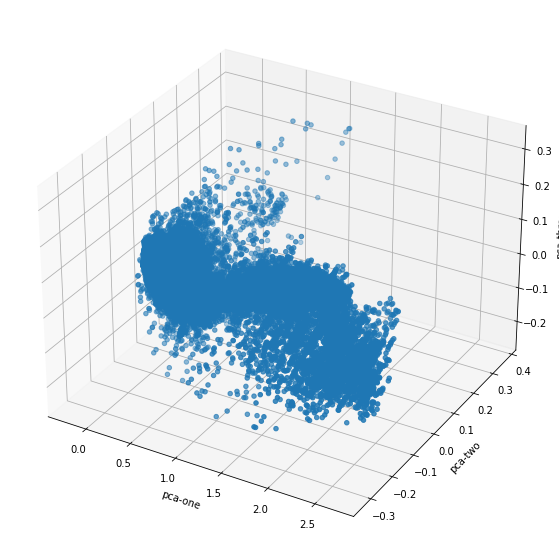

In [ ]:
#Data visu
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)
#gca(projection='3d')
rndperm = np.random.permutation(train_data.shape[0])
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=train_data.loc[rndperm,:]["pca-one"], 
    ys=train_data.loc[rndperm,:]["pca-two"], 
    zs=train_data.loc[rndperm,:]["pca-three"], 
    #c=train_data.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
#data augmentation

#trainset
  #creation of the trainset of the cloud dataset
filenames = glob.glob("/content/drive/MyDrive/Colab Notebooks/DL project/data/clouds/train/*.png")
images= [Image.open(fn).convert('L') for fn in filenames]
train_clouds_array= np.dstack([np.array(im) for im in images])
#train_clouds_array=train_clouds_array.reshape(124416,45)#reshape to have 288*432 lines
#train_clouds=pd.DataFrame(train_clouds_array)

#validset
  #creation of the trainset of the cloud dataset
filenames2 = glob.glob("/content/drive/MyDrive/Colab Notebooks/DL project/data/clouds/valid/*.png")
images2= [Image.open(fn).convert('L') for fn in filenames2]
valid_clouds_array = np.dstack([np.array(im) for im in images2])
#valid_clouds_array=valid_clouds_array.reshape(124416,23)#reshape to have 288*432 lines
#valid_clouds=pd.DataFrame(valid_clouds_array)
#testset
  #creation of the trainset of the cloud dataset
filenames3 = glob.glob("/content/drive/MyDrive/Colab Notebooks/DL project/data/clouds/test/*.png")
images3= [Image.open(fn).convert('L') for fn in filenames3]
test_clouds_array = np.dstack([np.array(im) for im in images3])


In [ ]:
train_clouds_array.shape


(288, 432, 45)

In [ ]:
valid_clouds_array.shape


(288, 432, 23)

In [ ]:
test_clouds_array.shape

(288, 432, 27)

In [ ]:
df_train.shape


(429412, 12)

In [ ]:
df_test.shape

(194863, 12)

In [ ]:
df_val.shape

(213102, 12)

In [ ]:
train_clouds_array=train_clouds_array.reshape(124416,45)#reshape to have 288*432 lines
train_clouds_array=train_clouds_array.astype(int) #make the clouds informations integers
train_clouds=np.concatenate((train_clouds_array,np.zeros((304996,45))))# train clouds ready to be concatenate with df_train

print("train_clouds:",train_clouds.shape)


train_clouds: (429412, 45)


In [ ]:
print(df_train.iloc[:,11].shape)
print(df_train.iloc[:,11])

(429412,)
0         0
1         0
2         0
3         0
4         0
         ..
429407    1
429408    1
429409    1
429410    1
429411    1
Name: Class_Num, Length: 429412, dtype: int64


In [ ]:
#Creation of the dataset 
df_train_labels= df_train.iloc[:, 11].values.reshape((-1, 1))  # reshape to column vector
  #train set
train=np.concatenate((df_train.iloc[:,0:11], train_clouds),axis=1)
train=np.concatenate((train,df_train_labels),axis=1)

In [ ]:
print(train.shape)
print(train)
print(df_train_labels)

(429412, 57)
[[1.02548726e-01 9.95887294e-02 8.30654576e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 [1.02548726e-01 1.02168523e-01 8.58148932e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 [1.01787083e-01 1.03341155e-01 8.57049152e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 ...
 [6.24879897e-02 5.98922931e-02 4.44645360e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.24879897e-02 5.76597191e-02 4.31431532e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.24879897e-02 5.91872670e-02 4.30330336e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
  #test set

test_clouds_array=test_clouds_array.reshape(124416,27)#reshape to have 288*432 lines
test_clouds_array=test_clouds_array.astype(int) #make the clouds informations integers
test_clouds=np.concatenate((test_clouds_array,np.zeros((70447,27))))

print("train_clouds:",train_clouds.shape)



train_clouds: (429412, 45)


In [ ]:
df_test_labels= df_test.iloc[:, 11].values.reshape((-1, 1))  # reshape to column vector
test=np.concatenate((df_test.iloc[:,0:11], test_clouds),axis=1)
test=np.concatenate((test,df_test_labels),axis=1)
print(test)

[[2.68599205e-02 2.32307259e-02 1.28511488e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [2.68599205e-02 2.23931037e-02 1.29624968e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [2.68599205e-02 2.23931037e-02 1.38533069e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 ...
 [5.89660630e-02 5.50550669e-02 3.66262123e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.13252988e-02 4.57734019e-02 3.87189351e-02 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]
 [5.33628315e-02 4.70657833e-02 3.13393362e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [ ]:
 #valid set
valid_clouds_array=valid_clouds_array.reshape(124416,23)#reshape to have 288*432 lines
valid_clouds_array=valid_clouds_array.astype(int) #make the clouds informations integers
valid_clouds=np.concatenate((valid_clouds_array,np.zeros((88686,23))))

print("valid_clouds:",valid_clouds.shape)


valid_clouds: (213102, 23)


In [ ]:
df_val_labels= df_val.iloc[:, 11].values.reshape((-1, 1))  # reshape to column vector
valid=np.concatenate((df_val.iloc[:,0:11],valid_clouds),axis=1)
valid=np.concatenate((valid,df_val_labels),axis=1)
print("df_test:",df_val.shape)
print(valid)

df_test: (213102, 12)
[[5.54813668e-02 4.99140620e-02 4.16151099e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [5.54813668e-02 5.65888174e-02 4.21647131e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [5.67486621e-02 6.18583634e-02 5.23872860e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 ...
 [6.51467443e-02 5.84480278e-02 4.29493301e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.51467443e-02 5.88020198e-02 4.38328125e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.45059496e-02 5.85660301e-02 4.08510752e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [ ]:
train_data_augmented = train[:, :-1] # extract input features from train
train_labels_augmented = train[:, -1] # extract target labels from train
print(train_data_augmented.shape)
print(train_labels_augmented.shape)
print(train_data_augmented)

#Data visu
pca_augmented = PCA(n_components=3)
pca_augmented_result = pca_augmented.fit_transform(train_data_augmented)
print('Shape of pca_augmented_result:', pca_augmented_result.shape)

# create new array to store PCA results along with original input features
train_data_pca_augmented = np.hstack([train_data_augmented, pca_augmented_result])

print('Explained variation per principal component: {}'.format(pca_augmented.explained_variance_ratio_))


(429412, 56)
(429412,)
[[1.02548726e-01 9.95887294e-02 8.30654576e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 [1.02548726e-01 1.02168523e-01 8.58148932e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 [1.01787083e-01 1.03341155e-01 8.57049152e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 ...
 [6.24879897e-02 5.98922931e-02 4.44645360e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.24879897e-02 5.76597191e-02 4.31431532e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.24879897e-02 5.91872670e-02 4.30330336e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Shape of pca_augmented_result: (429412, 3)
Explained variation per principal component: [9.99688084e-01 7.34433815e-05 2.72970443e-05]


<ipython-input-230-23e00df28c90>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax_augmented.scatter(


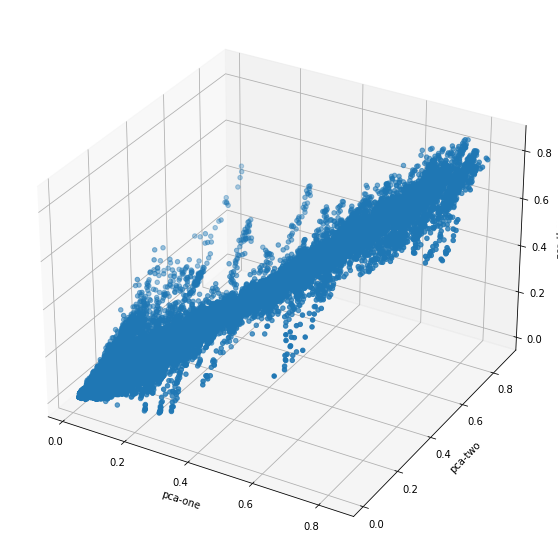

In [ ]:
#Data visu
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)
#gca(projection='3d')

rndperm_augmented = np.random.permutation(train_data_pca_augmented.shape[0])
ax_augmented = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax_augmented.scatter(
    xs=train_data_pca_augmented[rndperm_augmented,0], 
    ys=train_data_pca_augmented[rndperm_augmented,1], 
    zs=train_data_pca_augmented[rndperm_augmented,2], 
    #c=train_data.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax_augmented.set_xlabel('pca-one')
ax_augmented.set_ylabel('pca-two')
ax_augmented.set_zlabel('pca-three')
plt.show()


In [ ]:
#Data visu
train_data_augmented = train[:, :-1] # extract input features from train
train_labels_augmented = train[:, -1] # extract target labels from train
print(train_data_augmented.shape)
print(train_labels_augmented.shape)
print(train_data_augmented)


(429412, 56)
(429412,)
[[1.02548726e-01 9.95887294e-02 8.30654576e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 [1.02548726e-01 1.02168523e-01 8.58148932e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 [1.01787083e-01 1.03341155e-01 8.57049152e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 ...
 [6.24879897e-02 5.98922931e-02 4.44645360e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.24879897e-02 5.76597191e-02 4.31431532e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.24879897e-02 5.91872670e-02 4.30330336e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
#Data visu
pca_augmented = PCA(n_components=3)
pca_augmented_result = pca_augmented.fit_transform(train_data_augmented)
print('Shape of pca_augmented_result:', pca_augmented_result.shape)

train_data_augmented['pca-one'] = pca_augmented_result[:,0]
train_data_augmented['pca-two'] = pca_augmented_result[:,1] 
train_data_augmented['pca-three'] = pca_augmented_result[:,2]

print('Explained variation per principal component: {}'.format(pca_augmented_result.explained_variance_ratio_))


Shape of pca_augmented_result: (429412, 3)


IndexError: ignored

In [ ]:
#Data visu
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)
#gca(projection='3d')
rndperm_augmented = np.random.permutation(train.shape[0])
ax_augmented = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax_augmented.scatter(
    xs=train.loc[rndperm_augmented,:]["pca-one"], 
    ys=train.loc[rndperm_augmented,:]["pca-two"], 
    zs=train.loc[rndperm_augmented,:]["pca-three"], 
    #c=train_data.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax_augmented.set_xlabel('pca-one')
ax_augmented.set_ylabel('pca-two')
ax_augmented.set_zlabel('pca-three')
plt.show()